# Pima Indians Diabetes Database
## Predict the onset of diabetes based on diagnostic measures
The Pima Indian population of Arizona has one of the highest prevalence of diabetes of any population in the world. To contribute to the study investigating the significance of health-related predictors of diabetes in Pima Indians Women, this project seeks to perform Data Visualisation and various Machine Learning Classification algorithms on the Pima Indians dataset.

This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The main objective of this project is therefore to perform Data Visualisation and to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

## 1. Loading Libraries
- `pandas` to read data from CSV file and manipulate it for further use
- `numpy` convert the data into a format suitable to feed the classification model
- `seaborn` and `matplotlib` for visualizations
- `Logistic Regression algorithm` from `sklearn` for building the classification model
- `joblib` from `sklearn` to save the model for future use.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

!pip install joblib
from sklearn.externals import joblib

## 2. Loading Data
The data is saved locally in a CSV file called diabetes.csv. The data can also be found online: https://www.kaggle.com/uciml/pima-indians-diabetes-database. 
First the dataset is read into a pandas dataframe called `diabetesDF`, next using the `head()` function to first five records from the dataset are printed.

In [11]:
#loading CSV file
diabetesDF = pd.read_csv('C:/Users/Luci/Desktop/Data Science/DataQuest/my_datasets/pima-indians-diabetes-database/diabetes.csv')

#top 5 records
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Data Exploration

**Data Information:**

In [13]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
diabetesDF.shape

(768, 9)

The dataset has **768 rows** and **9 columns**. The datasets consist of **eight medical predictor (independent) variables** and **one target (dependent) variable, Outcome**. 

The independent variables are: 
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)


The target (dependent) variable is
1. Outcome (0 - non diabetic or 1 - diabetic)


In [15]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
diabetesDF["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Correlation
Correlation analysis helps to evaluate the strength of relationship between two quantitative variables. A high correlation means that the two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

For this project the correlation of every pair of features (the eight medical predictor) and the outcome variable are established and a heatmap is used to visualize the correlations.

In [31]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


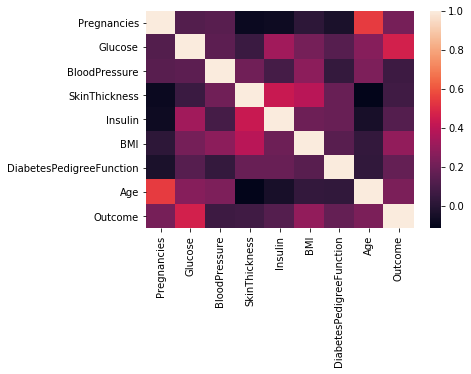

In [27]:
#heat map
sb.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In the above heatmap, brighter colors indicate more correlation. As observed from the correlation table and the heatmap: ***glucose levels, age, BMI*** and ***number of pregnancies*** have significant correlation with the ***outcome variable***. 

Also,***age*** and ***pregnancies*** have a high correlation, similarly ***insulin*** and ***skin thickness*** are strongly related. Also theres a high correlation between ***BMI*** and ***skin thickness***.

## 3. Data Visualization
Visualizing the relations between the variables:
### a. Diabetic and Non-diabetic

Text(0.5, 1.0, 'Barplot visualization of the number of non-diabetic (0) and diabetic (1) people in the dataset:\n')

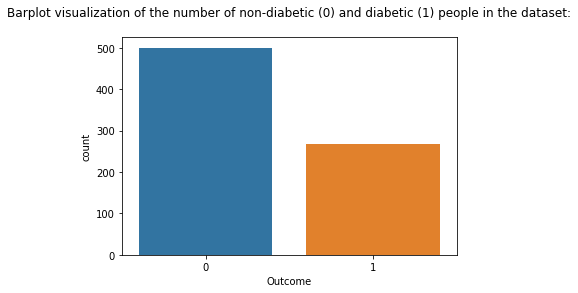

In [67]:
#count Plot: to display the count of diabetic and non-diabetic people
diabetic_nondiabetic_count = sb.countplot(x='Outcome', data=diabetesDF)
diabetic_nondiabetic_count.set_title('Barplot visualization of the number of non-diabetic (0) and diabetic (1) people in the dataset:\n')

### b. Outcome vs Age

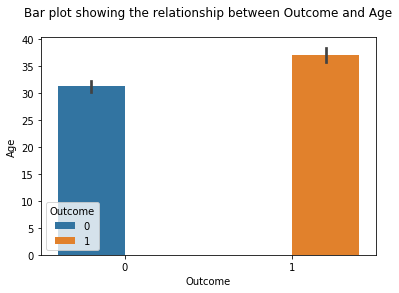

In [54]:
#bar chart
outcome_vs_age = sb.barplot(x="Outcome", y="Age", hue="Outcome", data=diabetesDF).set_title('Bar plot showing the relationship between Outcome and Age\n')


The cell above shows the relation between Age and Outcome. The barplot shows the mean age for each of the output classes. From the plot, it is observed that the mean age of people having diabetes is higher.

### c. Outcome vs Glucose levels

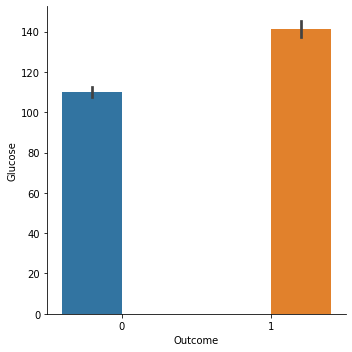

In [59]:
#bar chart
outcome_vs_glucose = sb.catplot(x="Outcome", y="Glucose", hue="Outcome", kind="bar", data=diabetesDF)

From the cell above, the mean glucose levels for people having diabetes is higher.

### d. Age Distibution

Text(0.5, 1.0, 'Age Distribution:\n')

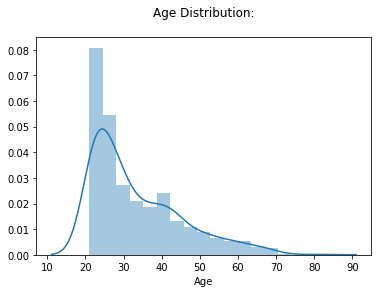

In [69]:
#histogram showing the age distribution in the dataset
age_distribution = sb.distplot(diabetesDF['Age'])
age_distribution.set_title('Age Distribution:\n')

From the histogram, most of the women in the study were between 20 and 30 years.

### e. Age, Glucose levels and Outcome

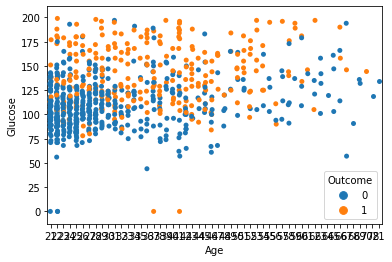

In [94]:
#stip plot
stripplot = sb.stripplot(x='Age', y='Glucose', data=diabetesDF, jitter=True, hue='Outcome')

From the strip plot above: the higher the glucose level the more likely the outcome is diabetic. Also the older age groups had more likelihood of being diabetic

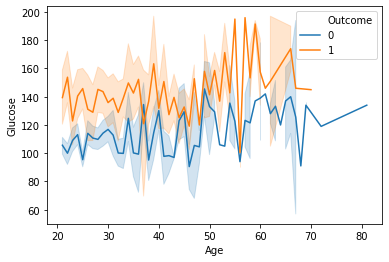

In [90]:
#line plot
glucose_age_vs_outcome = sb.lineplot(x="Age", y="Glucose", data=diabetesDF, hue="Outcome")

The line plot above emphasizes on the strip plot observations. High glucose levels relate directly to a diabetic outcome.

## 4. Dataset Preparation (splitting)
When building a classification model, there has to be a way to know how it’s actually performing. Dividing the dataset into a **training set** and a **test set** allows one to determine how the model is performing.

0.7 of the data set is used as the training set, which includes the correct answers. Then the other 0.3 of the data set is used to test the model. Without giving the model the answers, its performance is measured by how accurately it determines the answers of the remaining 0.3 of the dataset i.e the test set.

`scikit-learn` comes with a built-in function for doing splitting of the dataset: `train_test_split()`.

In [79]:
from sklearn.model_selection import train_test_split

X = diabetesDF.drop('Outcome',1)   # the features(columns) to be analyzed
ylabels = diabetesDF['Outcome']      # the labels, or answers, to be tested against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

## 5. Training the Machine Learning Model
A logistic regression ML model will be used for classifiction purposes(either diabetic or non-diabetic).Since the model is readily available in `sklearn`, the training process involves creating an instance called `diabetes_check` and then using the `fit() function` to train the model.

In [96]:
#creating an instance
diabetes_check = LogisticRegression()
#training the model
diabetes_check.fit(X_train, y_train)

C:\Users\Luci\Anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 6. Evaluating the Machine Learning Model
Next, the model makes predictions using the `X_test` test data. 

### Accuracy, Precision, Recall
Then using various functions of the `metrics module` the model’s **accuracy, precision,** and **recall** are evaluated.
- *Accuracy* refers to the percentage of the total predictions the model makes that are completely correct.
- *Precision* describes the ratio of true positives to true positives plus false positives in our predictions.
- *Recall* describes the ratio of true positives to true positives plus false negatives in our predictions

All the three metrics are measured from 0 to 1, where 1 is predicting everything completely correctly. Therefore, the closer the model’s scores are to 1, the better.

In [83]:
from sklearn import metrics

# predicting with a test dataset
diabetes_predict = diabetes_check.predict(X_test)

# model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, diabetes_predict))
print("Logistic Regression Precision:",metrics.precision_score(y_test, diabetes_predict))
print("Logistic Regression Recall:",metrics.recall_score(y_test, diabetes_predict))

Logistic Regression Accuracy: 0.7922077922077922
Logistic Regression Precision: 0.7627118644067796
Logistic Regression Recall: 0.569620253164557


From the cell above, it can be summarised that the model has a precision of 0.79 that is 79%. This is to mean the model correctly identified 78% of the positive identifications made.

The model 0.56 i.e. 56% recall means the model correctly identified 56% of the actual positives in the dataset.

Finally the model's 0.79 that is 79% accuracy means 79% of the model's predictictions are completely correct.

### Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,diabetes_predict)
conf

array([[138,  14],
       [ 34,  45]], dtype=int64)

From the confusion matix: **138 True Positives** were identified out of the total **168 Actual Positives**(TP + FN). **45 True Negatives** were identified out of **59 Actual Negatives**(TN + FP). There were 14 False Positives (predicted as Positive yet it should be Negative) and 34 False Negatives (Predicted as Negative yet it should be Positive).

## Conclusion
The Logistic Regression ML model correctly predicted the `Outcome` 79% of the time. When it predicted an `Outcome` was diabetic, the prediction was actually True 76% of the time. When handed a diabetic outcome, the model identified it as diabetic 56% of the time.